<a href="https://colab.research.google.com/github/yooseungjun/ML/blob/main/4%EC%9E%A5_%EB%8B%A4%EC%96%91%ED%95%9C_%EB%B6%84%EB%A5%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**04-1 로지스틱 회귀**

#**정리 - 다중분류**
 - 다중분류 : 2개이상의 클래스가 포함된 문제

In [57]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() #데이터프레임 처음 5개 행 출력
pd.unique(fish['Species']) #['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() #Species열 빼고 나머지 열들 가져오고 넘파이 배열로 바꿔준다
fish_input[:5] #fish_input 앞에 5개 행 보여준다.(0 ~ 4번 인덱스)
fish_target = fish['Species'].to_numpy() #fish 데이터프레임에서 Species열만 가져오고 넘파이배열로 바꾸기

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    fish_input,fish_target, random_state=42
)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
kn.score(train_scaled,train_target) #0.7983
kn.score(test_scaled,test_target) #0.85

kn.classes_ #['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
kn.predict(test_scaled[:5]) #['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'] 테스트 케이스 5개에 대해 결과 출력한다

#predict_proba() => 클래스별 확률값 출력한다
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
np.round(proba,decimals=4)
# [[0.     0.     1.     0.     0.     0.     0.    ]
#  [0.     0.     0.     0.     0.     1.     0.    ]
#  [0.     0.     0.     1.     0.     0.     0.    ]
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

distances, indexes = kn.kneighbors([test_scaled[3]])
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

#**정리 - 로지스틱 회귀**
- 회귀모델이지만 분류 모델이다
- 선형회귀와 동일하게 선형방정식 학습
 - Z = a*(Weight) + b*(Length) + c*(Diagonal) + d*(Height) + e*(Width) + f
 - Z는 어떤 값도 가능, But 확률 되려면 0~1값 가져야한다.
 - 시그모이드 함수(로지스틱 함수) : z가 큰 음수일때 0, 큰 양수일때 1
 - ![이미지](https://velog.velcdn.com/images%2Fmetterian%2Fpost%2Fee23f919-20f3-4acd-8110-b39a99df6096%2Fimage-20210413212222497.png)
- 불리언인덱싱 : True, False 값을 전달하여 행을 선택

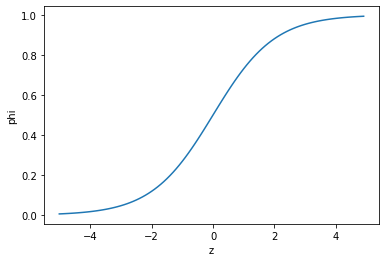

In [61]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1) # -5부터 5까지 0.1씩 증가하는 리스트
phi = 1/( 1+np.exp(-z) ) # 시그모이드함수 들어간 값들 리스트로
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
char_arr = np.array(['A','B','C','D','E'])
char_arr[[True,False,True,False,False]] #['A', 'C']

bream_smelt_indexes =  (train_target == 'Smelt')|(train_target == 'Bream') #도미와 빙어의 행들 모두 True로 만들기
#bream_smelt_indexes  => [ True False False ... False]

#도미와 빙어의 데이터만 골라내기
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)
lr.predict(train_bream_smelt[:5]) #처음 5개 샘플 예측 - ['Bream', 'Smelt', 'Bream', 'Bream', 'Bream']
lr.predict_proba(train_bream_smelt[:5]) 
#[0.99759855, 0.00240145],
#[0.02735183, 0.97264817],
#[0.99486072, 0.00513928],
#[0.98584202, 0.01415798],
#[0.99767269, 0.00232731]

lr.classes_ #['Bream', 'Smelt']
lr.coef #[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] 
lr.intercept_ #[-2.16155132]

- 로지스틱 회귀모델이 학습한 방정식
 - **Z** = -0.404*(Weight) - 0.576*(Length) - 0.663*(Diagonal) - 1.013*(Height) - 0.732*(Width) - 2.161
 - 선형회귀와 비슷하구나
 - Z값 계산 : LogisticRegression클래스 decision_function()매서드로 z값 출력

In [ ]:
decision = lr.decision_function(train_bream_smelt[:5])
decision #[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
#scipy라이브러리 시그모이드함수 expit() - np.exp()사용하는 것보다 편리하고 안전하다
from scipy.special import expit
expit(decision) #[0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731]

#**정리 - LogisticRegression**
- L2규제 : 계수의 제곱을 규제(릿지 회귀)
- 규제제어 매개변수 **C** : alpha와 반대로 작을수록 규제강도가 강해진다 


In [129]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)
lr.score(train_scaled,train_target) #0.932
lr.score(test_scaled,test_target) #0.925
lr.predict(test_scaled[:5]) #5개 테스트세트 결과 ['Perch', 'Smelt', 'Pike', 'Roach', 'Perch']
proba = lr.predict_proba(test_scaled[:5])
np.round(proba,decimals = 3)
# [[0.   , 0.025, 0.766, 0.001, 0.192, 0.013, 0.004],
# [0.   , 0.007, 0.068, 0.   , 0.014, 0.91 , 0.   ],
# [0.   , 0.   , 0.06 , 0.896, 0.038, 0.005, 0.   ],
# [0.019, 0.039, 0.395, 0.011, 0.471, 0.   , 0.065],
# [0.   , 0.001, 0.852, 0.005, 0.136, 0.003, 0.003]]
lr.classes_ #['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
lr.coef_ # [[-0.94321227, -0.55901363,  1.85487617,  6.03487835, -0.91928615]....[]]
lr.intercept_ #[ 0.13993767, -0.39212269,  3.14255476, -0.03508399,  2.23086966, -6.07216574,  0.98601033]
lr.coef_.shape # (7, 5)
lr.intercept_.shape #(7, )

(7,)

#**정리 - 소프트맥스 함수**
 - coef_ : 열 5개 + 행이 7개 -> z를 7번 계산한다는 뜻
 - intercept_ : 7개
 - **다중분류** : 클래스마다 z값 계산 -> 가장 높은 z 출력 == 예측 클래스
  - **소프트맥스함수**를 사용한다.
  - ![이미지](https://3.bp.blogspot.com/-u5Hwgle7FcI/WUME0JcHSnI/AAAAAAAAKE8/Vv96ahLFeGMa6wvG8Yx0mL5_alEOCIQHQCLcBGAs/s1600/b1.JPG)
  

In [135]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
